# <center><span style="color:	black "> Compte-rendu TP1: Numérisation d’un signal </span></center> 

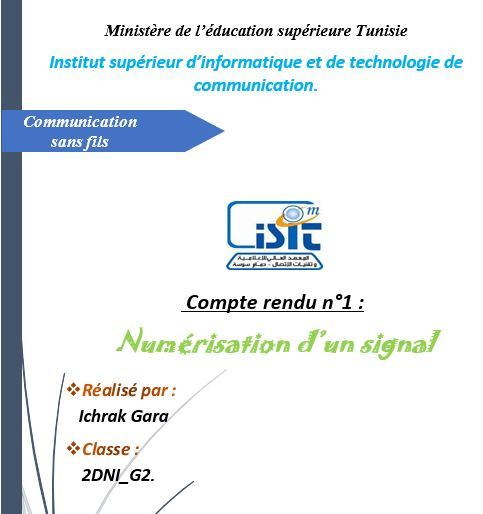

# <span style="color:	olivedrab ">I. Introduction: </span>

La numérisation consiste à transformer un signal analogique qui contient une quantité infinie d'amplitudes en un signal numérique contenant, lui, une quantité finie de valeurs. Le passage de l'analogique au numérique repose sur trois étapes successives : 
- **`l'échantillonnage`** 
- **`la quantification`** 
- **`le codage`**.


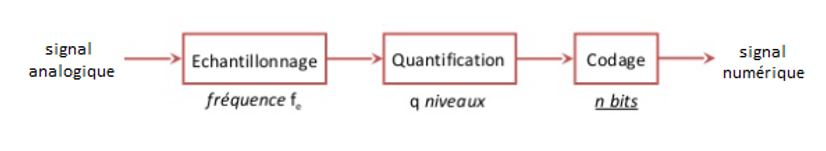

# <span style="color:	olivedrab ">II. Partie théorique: </span>

## <span style="color:	tomato ">1. Échantillonnage: </span>

L'échantillonnage consiste à prélever les valeurs d'un signal à intervalles définis, généralement réguliers. Il produit une suite de valeurs discrètes nommés échantillons.

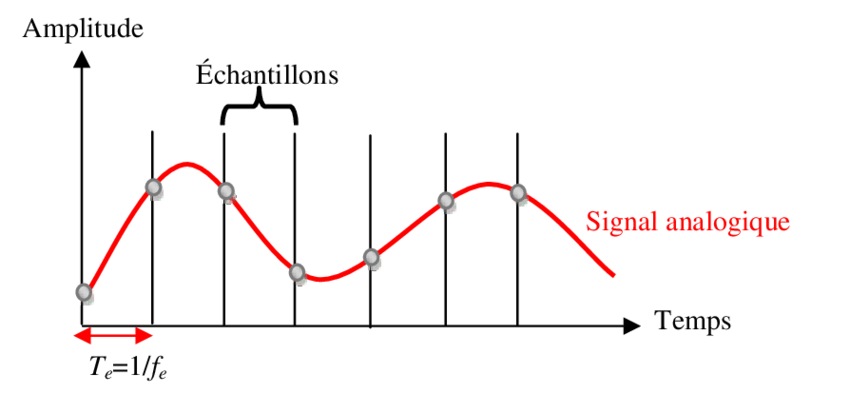

- Lors de la phase d’échantillonnage, il y a risque de perte d’information. Claude E. Shannon a donné une condition pour ne pas perdre d’information dans un signal (théorème de Shannon) :

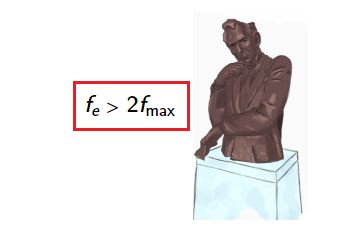

- Pour reconstruire un signal de sortie de manière fidèle au signal d'entrée, il faut choisir une fréquence d'échantillonnage au moins deux fois supérieure à la fréquence maximale contenue dans le signal d'entrée.

## <span style="color:	tomato ">2.	Quantification : </span>

- L’opération de quantification consiste à attribuer un nombre binaire à toute valeur prélevée au signal lors de l’échantillonnage. 
- C’est le CAN (convertisseur analogique numérique) qui réalise cette opération.
- Chaque niveau de tension est codé sur p bits, chaque bit pouvant prendre deux valeurs (0 ou 1). Donc un convertisseur à p bits possède 2^p niveaux de quantification.


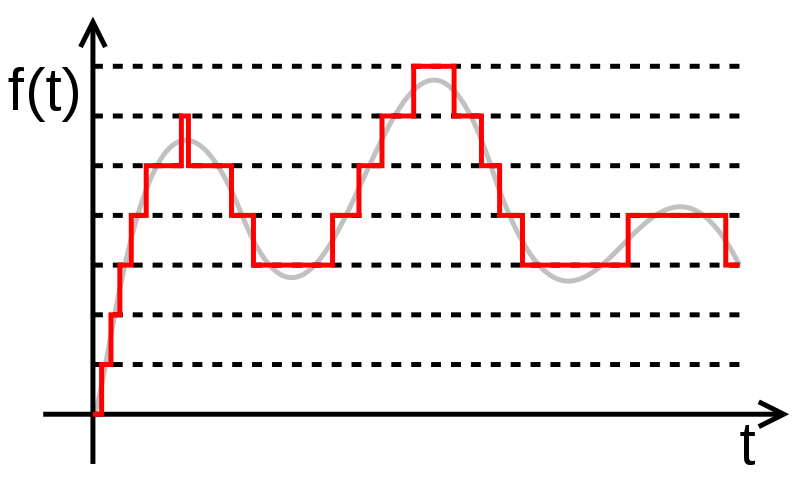

## <span style="color:	tomato ">3.	Codage: </span>

- Il consiste à représenter le signal numérisé à transporter, par un autre signal qui présente des variations d'amplitude régulièrement espacées dans le temps, celui-ci étant adapté aux propriétés physiques spécifiques des canaux de transmissions.

- chaque niveau est codé sur N bits (appelé nombre de bits de quantification)
- soit 2N combinaisons pour quantifier des échantillons

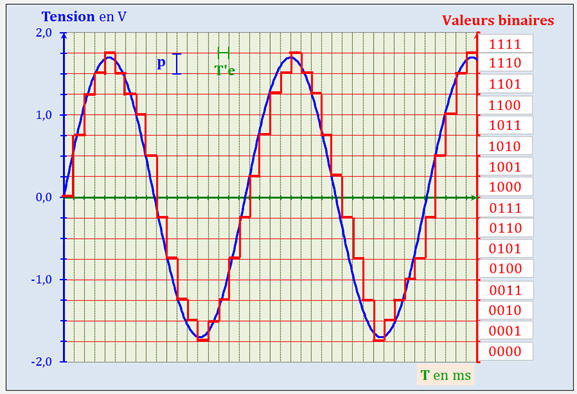

# <span style="color:	olivedrab ">III. les formules utilisées: </span>

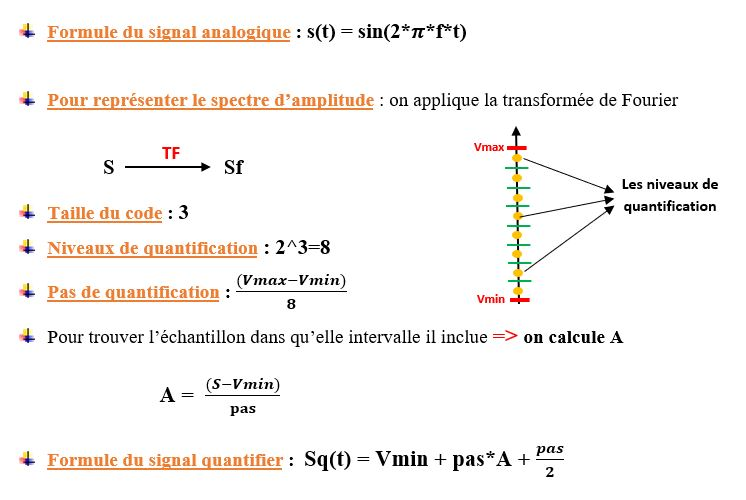

# <span style="color:	olivedrab ">IV. Partie Pratique: </span>

## <span style="color:	tomato ">Importation: </span>

In [38]:
import numpy as np
from math import *
import matplotlib.pyplot as plt
import matplotlib as mtp
from scipy.fftpack import fft, ifft,fftshift,fftfreq,ifftshift

## <span style="color:	tomato ">Déclaration: </span>

In [39]:
f=10   #fréquence du signal
fe=1000 #fréquence d'échantillonnage 
te=1/fe  #période d'échantillonnage 
t=np.arange(0,1,te)  #temps
s=[sin(2*pi*f*i) for i in t]  #la fonction sinusoidale du signal

## <span style="color:	tomato ">Représentation graphique du signal analogique: </span>

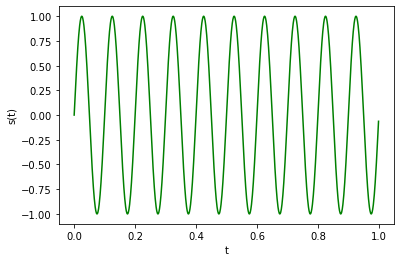

In [40]:
plt.plot(t,s,'g')
plt.xlabel("t")  #axe des abscisses (temps)
plt.ylabel("s(t)")  #axe des ordonnées (amplitude)
plt.show()

<div class="alert alert-success">
D'après la figure, on constate qu'il s'agit d'un signal sinusoïdal périodique d'amplitude égal à 1, d'une période égal à 0.1 second et d'une fréquence égal à 10 Hz.
</div>

## <span style="color:	tomato ">Échantillonnage  du signal: </span>

In [41]:
yf=fft(s) #transformer de fourier du signal s
xf=fftfreq(len(t),te)
xf=fftshift(xf) # pour la normalisation
sf=1.0/len(t) * fftshift(yf)

## <span style="color:	tomato ">Représentation du spectre du signal échantillonné: </span>

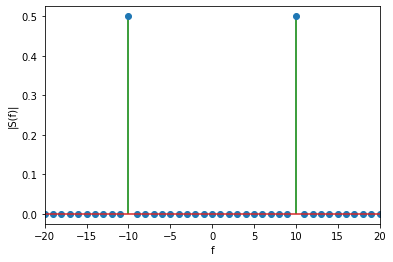

In [42]:
figure=plt.figure()
axes=figure.add_subplot(111)
axes.set_xlim(-20,20)
plt.stem(xf, np.abs(sf),'g')
plt.xlabel("f")
plt.ylabel("|S(f)|")
plt.show()

- La fonction **`fft`**, permet d'obtenir la transformée de Fourier Rapide du signal.


- Or que la fonction **`fftshift`**, permet de placer le coefficient de fréquence nulle (n = 0) au centre du spectre; cela permet de mieux visualiser la distribution du spectre => **`c'est la normalisation`**.



<div class="alert alert-success">
    
    
    
- D'après la figure, il s'agit donc d'un spectre de fréquence |S(F)| du signal analogique dans la bande fe base [-Fe/2 ; Fe/2].

    
    
- Alors, on a deux rais symétrique par rapport à 0 (de fréquence -10Hz et 10Hz) d'amplitude 0.5.
</div>

## <span style="color:	tomato ">Reconstruction du signal d'origine à partie du signal échantillonné: </span>

C:\Users\GASTON\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


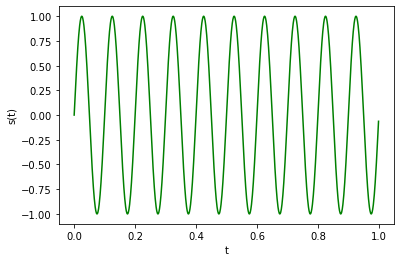

In [43]:
si=ifft(len(t)*ifftshift(sf)) # transformer de fourier inverse 
plt.plot(t,si,'g')
plt.xlabel("t")
plt.ylabel("s(t)")
plt.show()

- La fonction **`ifft`**, permet de calculer l'inverse de la transformée de Fourier discrète à n points 1-D calculée par fft. 


- ifft(fft(x)) == x


<div class="alert alert-success">

    
    
    
 - on a récupéré bien notre signal initiale s(t).
    
    
</div>

## <span style="color:	tomato ">Quantification uniforme du signal: </span>

### <span style="color:	teal ">principe: </span>

- Chaque niveau de quantification, on va leur affecter un code. 


- Puisque la Taille du code=3, on va avoir 2^3=8 code => 8 niveaux de quantification


- On va divisée l'intervalle [Vmax,Vmin] sur 8


- On calcule notre pas de quantification => pas=(Vmax-Vmin)/8


- Les niveaux de quantification sont les milieu de chaque intervalle


In [44]:
pas=(max(s)-min(s))/2**3  #calcule pas de quantification ((Vmax-Vmin)/2^n) avec n:taille du code

sq=[] #Signal quantifier
for i in s:
    
    if i!=max(s):sq.append((floor((i-min(s))/pas)*pas+min(s)+pas/2))  #lorsque i différente à la valeur maximal (Vmax)
    else:sq.append(i-pas/2)  #Lorsque i égal à la valeur maximale (Vmax)
        

- La fonction **`floor`**, permet de retourner la valeur minimale d'un nombre, soit l'entier le plus proche inférieur ou égal au nombre.


- **`Exemple:`**


    - FLOOR(1)=1.0
    
    - FLOOR(1.1)=1.0
    
    - FLOOR(1.7)=1.0


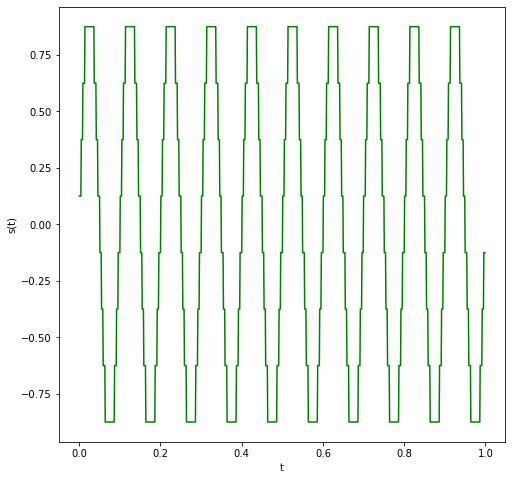

In [45]:
figue=plt.figure(figsize=[8,8])
plt.plot(t,sq,'g')
plt.xlabel("t")
plt.ylabel("s(t)")
plt.show()

<div class="alert alert-success">
    
- À partir de la représentation graphique, on a obtenu notre signal quantifier qui consiste à attribuer le niveau de quantification de toute valeur prélevée sur le signal lors de l'échantillonnage.
 
    
    
- Les huit niveaux de quantification ont été bien obtenue.

</div>

## <span style="color:	tomato ">Codage: </span>

In [46]:
b=[]
for i in sq:
    ii=((i-min(sq))/pas)
    b.append(format(int(ii),"03b")) #conversion en binaire sur 3 bits

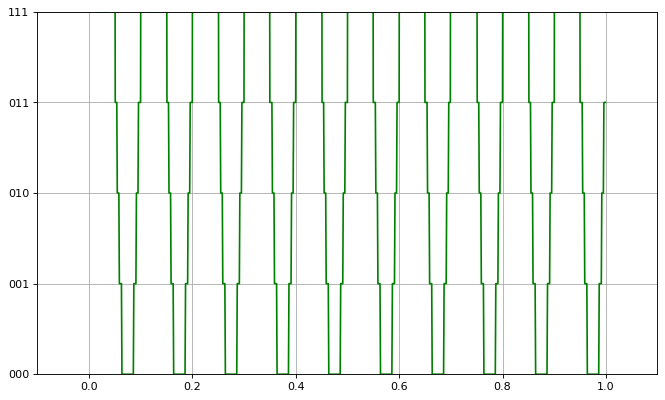

In [47]:
plt.figure(figsize=(10,6), dpi=80)
plt.plot(t,b,'g')
plt.axis([min(t)-0.1,max(t)+0.1,min(b),max(b)])
plt.grid(True)
plt.show()

<div class="alert alert-success">
    
- On a effectuer chaque niveau de quantification une valeur binaire codé sur 3 bits.
   
    
- il s'agit de 8 valeurs:
    
    - 000
    - 001
    - 010
    - 011
    - 100
    - 101
    - 110
    - 111
    
</div>

# <span style="color:	olivedrab ">V. Conclusion: </span>

Un signal analogique est continu au cours du temps alors d'un signal numérique ne peut prendre que certaines valeurs : on dit qu'il est quantifié. 


Pour numériser un signal analogique, il faut choisir une fréquence d'échantillonnage et une quantification : plus la fréquence d'échantillonnage est grande, plus le signal sera fidèle à l'original.


Le théorème de Shannon indique qu'il faut échantillonner à une fréquence au moins deux fois plus grande que le signal de départ.


La quantification correspond au nombre de valeurs de tension que peut prendre un signal : elle est liée à la résolution.

En résumé, une chaîne de numérisation du signal comportera les éléments suivants :

- **`Echantillonnage:`** pour prélever régulièrement tous les Te tel Fe > 2 Fmax


- **`Quantification:`** pour coder sur N bits les échantillons prélevés.


- **`Codage:`** pour transformer les niveaux en binaire.

